In [1]:
import numpy as np
import pandas as pd

In [15]:
df1 = pd.read_csv('student-mat.csv',sep = ";")
df2 = pd.read_csv('student-por.csv',sep = ";")

In [13]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [17]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [29]:
df1['pass'] = df1['G3'].apply(lambda x: 1 if x >= 10 else 0)

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['sex'] = le.fit_transform(df1['sex'])  

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
X = pd.get_dummies(df1.drop(['G3', 'pass'], axis=1), drop_first=True)
y = df1['pass']

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))


Accuracy: 0.9113924050632911
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.96      0.90      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.91      0.90        79
weighted avg       0.92      0.91      0.91        79



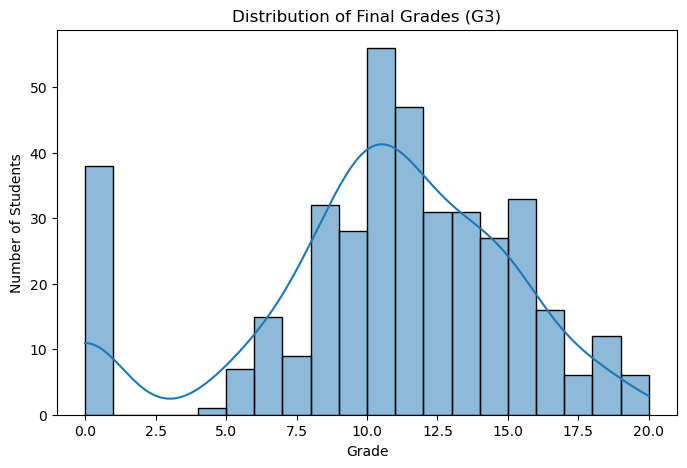

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df1['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.show()

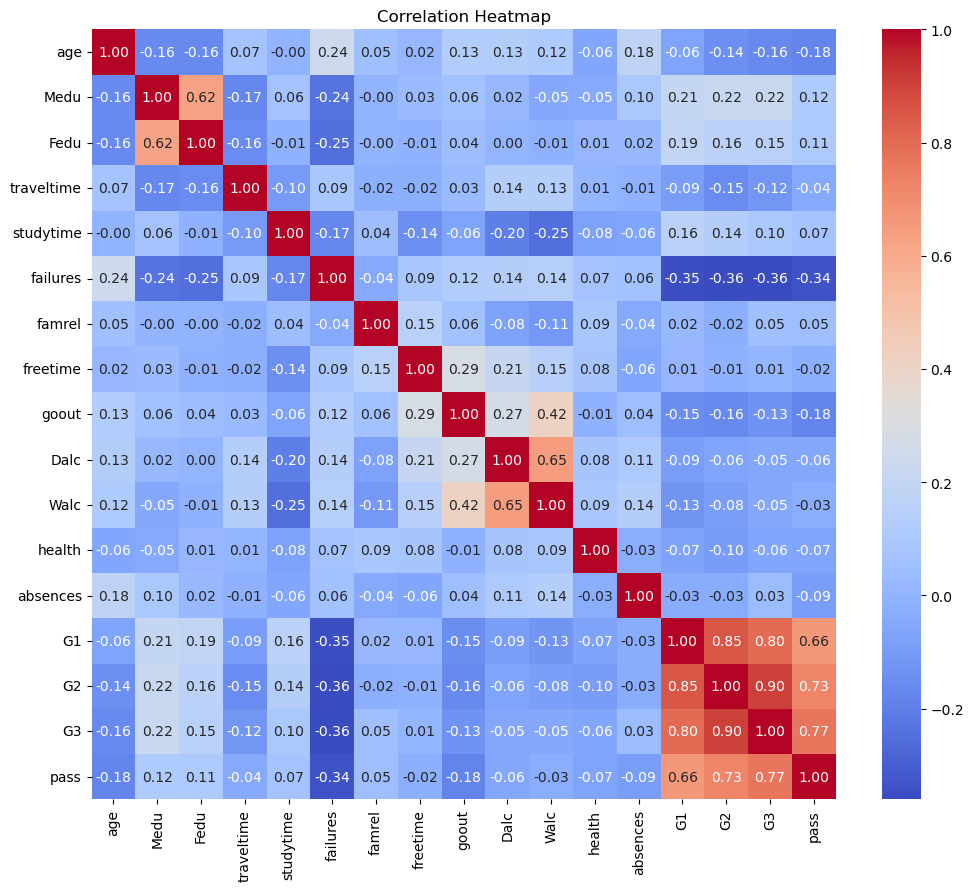

In [55]:
# Use only numeric columns for correlation
numeric_df = df1.select_dtypes(include=['int64', 'float64'])

# Then plot the heatmap
plt.figure(figsize=(12,10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [57]:
#  3. Pass vs Fail Count Plot

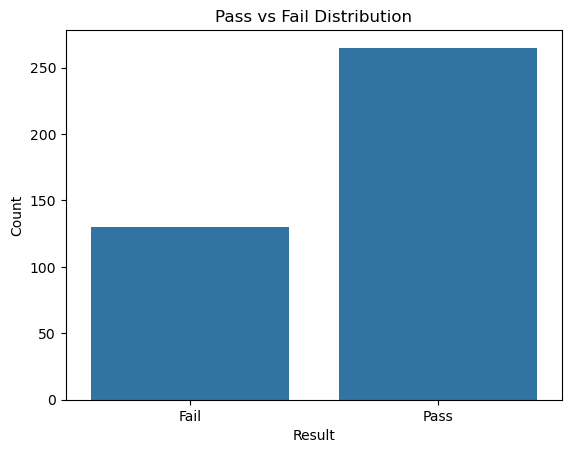

In [61]:
sns.countplot(x='pass', data=df1)
plt.xticks([0,1], ['Fail', 'Pass'])
plt.title('Pass vs Fail Distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()


In [63]:
# 4. Effect of Study Time on Passing

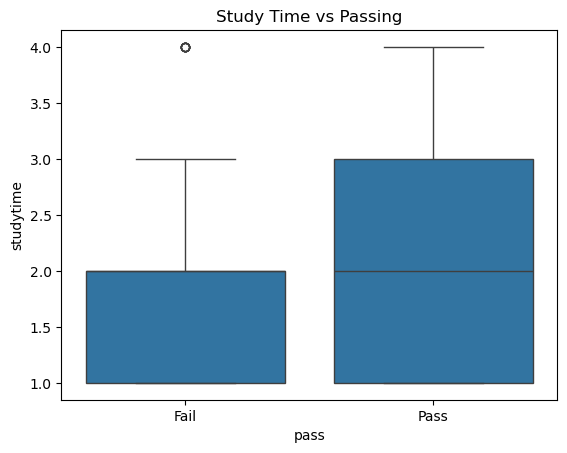

In [65]:
sns.boxplot(x='pass', y='studytime', data=df1)
plt.xticks([0,1], ['Fail', 'Pass'])
plt.title('Study Time vs Passing')
plt.show()

In [67]:
#5. Absences vs Final Grade Scatter

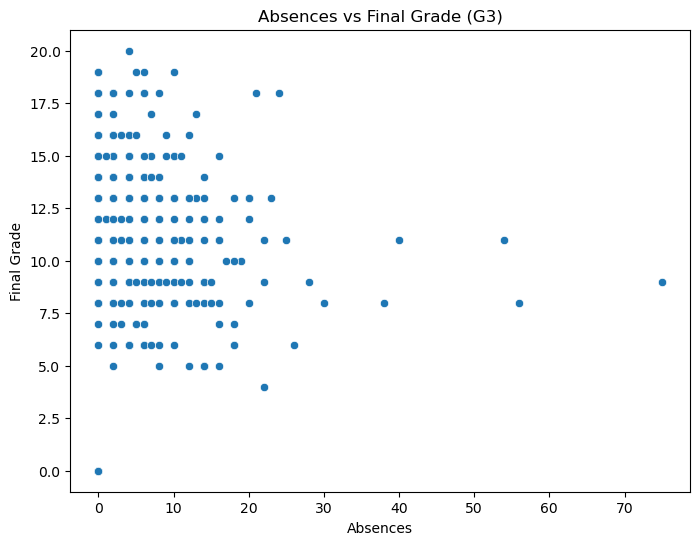

In [69]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='absences', y='G3', data=df1)
plt.title('Absences vs Final Grade (G3)')
plt.xlabel('Absences')
plt.ylabel('Final Grade')
plt.show()


In [71]:
#  6. Compare Grades by Gender

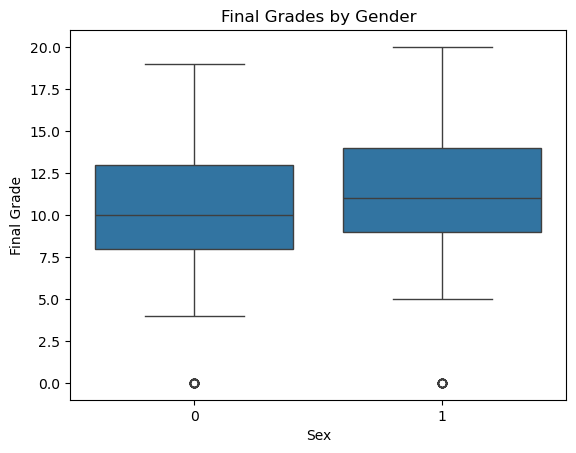

In [73]:
sns.boxplot(x='sex', y='G3', data=df1)
plt.title('Final Grades by Gender')
plt.xlabel('Sex')
plt.ylabel('Final Grade')
plt.show()
